<div style="background-color:#4d1a99; padding: 20px; border-radius: 10px;"> 

# <h2 style="color: #fbfaf9ff; text-align: center;">**AI Agents + Agentic AI + RAG + LangGraph (All in One)**</h2>

## What is an AI Agent?

An **AI Agent** is an intelligent system that can **think, plan, and take actions** using tools — not just generate text.

**Example:**
You say: *"Book me a flight to Dubai."*
Agent searches flights + compares prices + books a ticket 

---

## How AI Agents Work (ReAct Loop)

```
Input → Think → Decide → Act → Observe → Repeat
```

**Example:**
User asks: *"Solve 5×8 and email me the result"* → Agent calculates → sends email → done 

---

## Key Components of an AI Agent

| Component | Purpose                | Example                 |
| --------- | ---------------------- | ----------------------- |
| LLM       | Brain of agent         | GPT thinks step-by-step |
| Tools     | Take actions           | Calculator, Browser     |
| Memory    | Stores history         | Saves past messages     |
| Planner   | Breaks goal into steps | Plan before acting      |
| State     | Current task data      | Saves progress          |
| Graph     | Controls workflow      | LangGraph manages steps |

---

## Types of AI Agents

| Type           | Short Use          | Example                  |
| -------------- | ------------------ | ------------------------ |
| Reactive Agent | Simple chat        | Question answering       |
| Tool Agent     | Uses tools         | Calculator bot           |
| RAG Agent      | Uses your data     | PDF Q&A                  |
| Workflow Agent | Multi-step tasking | Report generator         |
| Multi-Agent    | Team of agents     | Research + Writer agents |

---

## AI Agent vs Normal Chatbot

| Feature      | Chatbot   | AI Agent |
| ------------ | --------- | -------- |
| Only answers | ✅ Yes     | ✅ Yes    |
| Uses tools   | ❌ No      | ✅ Yes    |
| Memory       | ❌ Limited | ✅ Yes    |
| Autonomous   | ❌ No      | ✅ Yes    |
| Solves tasks | ❌ No      | ✅ Yes    |

---

## Agentic AI vs AI Agent vs RAG

| Feature              | AI Agent | Agentic AI        | RAG     | Agentic RAG        |
| -------------------- | -------- | ----------------- | ------- | ------------------ |
| Uses tools           | ✅        | ✅                 | ❌       | ✅                  |
| Retrieves knowledge  | ❌        | ❌                 | ✅       | ✅                  |
| Planning & reasoning | ✅        | ✅                 | ❌       | ✅                  |
| Example              | Code bot | Self-planning bot | PDF Q&A | Smart research bot |
----------------------------------------------------------------------------------------------
| Type            | Example                                                       |
| --------------- | ------------------------------------------------------------- |
| **RAG**         | Q&A from a PDF                                                |
| **AI Agent**    | Book a flight + send confirmation                             |
| **Agentic RAG** | Read multiple company reports and generate a business summary |
| **Agentic AI**  | Build, test, and deploy code automatically                    |

---

# **What is LangGraph?**

**LangGraph** is a framework to build **AI agents as graphs**—step-by-step workflows with **memory, loops, decisions, and tools**.

Built on LangChain
Perfect for **Agentic AI**
Used by **advanced AI systems**

---

## 🔗 Why **"Graph"?**

Your workflow isn't always straight — sometimes:

Step 1 → Step 2 → Step 3
Condition: go to different step
Loop: retry until success
Connect multiple agents

---

## Core Concepts of LangGraph

| Concept | Meaning       | Example                   |
| ------- | ------------- | ------------------------- |
| State   | Shared memory | Stores user input, result |
| Node    | A step/task   | Call Gemini to summarize  |
| Edge    | Connection    | Next step in graph        |
| Graph   | Full workflow | Complete agent logic      |

---



# **We are building a simple AI workflow graph where:**

It starts with planning to play. Then randomly chooses cricket or badminton.Updates a graph_info string 
Ends the workflow.

# What is State in LangGraph?
The State schema serves as the input schema for all Nodes and Edges in the graph.

### Why use TypedDict?
✅ Easy to manage workflows

* Here it only contains `graph_info`, which is a **text log** of actions.

```python
{"graph_info": "Hey My name is Furqan"}
```



### 🔹 Concept

* **State** = a dictionary that stores workflow data.
* **graph_info** (or **graph_state**) = a key inside state that keeps the **“story” of the workflow**.
* **Node** = a function that **updates this key** and returns a new state.
* Each node **does not overwrite the previous info**, it **adds to it**.
ns the first step**.

---

In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

### 🔹 Simple Meaning

* Each node **adds its own information** to `graph_info`.
* The **final state** contains the **full story** of everything that happened.
* Think of `graph_info` like a **running log** of the workflow.


In [ ]:
'''#### Nodes
Nodes are just python functions.
The first positional argument is the state, as defined above.
Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].
Each node returns a new value of the state key graph_state.
By default, the new value returned by each node will override the prior state value.

* Each function is a **node** in the workflow.
* They **take `state` as input**, update `graph_info`, and **return new state**.'''

def start_play(state:State):
    print("Start_Play node has been called")
    return {"graph_info":state['graph_info'] + " I am planning to play"} #{"graph_info": "Hey My name is Furqan I am planning to play"}

def cricket(state:State):
    print("My Cricket node has been called")
    return {"graph_info":state['graph_info'] + " Cricket"} #{"graph_info": "Hey My name is Furqan I am planning to play Cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info'] + " Badminton"} #{"graph_info": "Hey My name is Furqan I am planning to play Badminton"}


    

In [3]:
import random
from typing import Literal

'''* This function **decides which node to run next**.
* Returns `"cricket"` or `"badminton"` randomly.
* `Literal` type hints that it can **only return these two strings**.
'''


def random_play(state:State)-> Literal['cricket','badminton']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

#### Graph Construction
Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

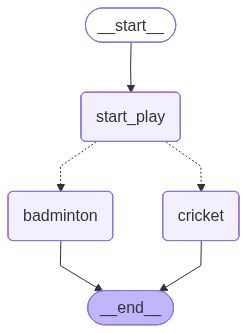

In [ ]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph * `StateGraph(State)` creates a new **graph workflow** using the `State` type.
graph=StateGraph(State)

## Adding the nodes  * Each node function is **added to the graph** with a unique name.
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

## Schedule the flow of the graph

graph.add_edge(START,"start_play") #* `add_edge(START, "start_play")`: Workflow **starts at `start_play`**.
graph.add_conditional_edges("start_play",random_play) #* `add_conditional_edges("start_play", random_play)`: After `start_play`, **run `cricket` or `badminton`** based on `random_play`.
graph.add_edge("cricket",END) #* `add_edge("cricket", END)` and `add_edge("badminton", END)`: Both nodes **lead to the end of the workflow**.
graph.add_edge("badminton",END)

## Compile the graph * Prepares the workflow for execution.m* Validates nodes, edges, and conditional flows.
graph_builder=graph.compile()

# Graph View 
# View Shows a **graph diagram**:
# START → start_play → cricket → END↘ badminton → END
# Helps understand the **workflow visually**.

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
# Starts the workflow with initial state:
# `random_play` chooses **cricket** or **badminton**. The final state contains **all updates in `graph_info`

graph_builder.invoke({"graph_info":"Hey My name is furqan"})

Start_Play node has been called
My Cricket node has been called


{'graph_info': 'Hey My name is furqan I am planning to play Cricket'}

## 🔥 Summary

1. **State** = dictionary that stores workflow data.
2. **Node** = a function that reads state, updates it, and returns new state.
3. **Conditional node** = chooses next node based on logic (here, random).
4. **Graph** = connects nodes in a workflow (edges define the flow).
5. **Compile & Invoke** = prepares the graph and runs it.
6. **Visualize** = optional but helps see the flow.
